## Comportamiento financiero de compradores ##
 Este proyecto de análisis de datos está enfocado en el comportamiento financiero de compradores, a partir de una serie de métricas clave relacionadas con el uso de productos financieros, como tarjetas de crédito. Las columnas disponibles proporcionan información detallada sobre los saldos, frecuencia de pagos, tipos de compras, adelantos en efectivo, límites de crédito, entre otros

Segmentación de clientes:
-Clasificación de clientes según su uso de tarjeta de crédito (alto balance vs. bajo balance, compradores frecuentes vs. esporádicos).
-Agrupar clientes según tipos de compra (compras en una sola transacción vs. compras a plazos).

Detección de patrones de compras:
-Identificar tendencias en las compras con tarjeta, como compras de alto valor en una sola transacción o compras fraccionadas.
-Evaluar la relación entre la frecuencia de compras y el uso de adelantos en efectivo.

Análisis de riesgo crediticio:
-Analizar la relación entre el saldo, el límite de crédito y los pagos mínimos para identificar riesgos potenciales.
-Estudiar el comportamiento de pagos completos (PRC_FULL_PAYMENT) y su impacto en la deuda acumulada.

Evaluación de la lealtad del cliente:
-Estudiar la tenencia (TENURE) y cómo está relacionada con otros factores como el uso de crédito y el cumplimiento de pagos.

Predicción del comportamiento financiero:
-Usar modelos predictivos para anticipar el comportamiento futuro de los clientes, como la probabilidad de que realicen compras a plazos o utilicen adelantos en efectivo.



In [81]:
#importamos librserias
import pandas as pd
import numpy as np

In [82]:
#lectura de DF
df = pd.DataFrame(pd.read_csv("Customer_Dataset.csv", sep=',', header=None))
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQ,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
1,C10001,40.900749,0.818182,95.4,0,95.4,0,0.166667,0,0.083333,0,0,2,1000,201.802084,139.509787,0,12
2,C10002,3202.467416,0.909091,0,0,0,6442.945483,0,0,0,0.25,4,0,7000,4103.032597,1072.340217,0.222222,12
3,C10003,2495.148862,1,773.17,773.17,0,0,1,1,0,0,0,12,7500,622.066742,627.284787,0,12
4,C10004,1666.670542,0.636364,1499,1499,0,205.788017,0.083333,0.083333,0,0.083333,1,1,7500,0,NaN,0,12


In [83]:
df = df.rename(columns=df.iloc[0]) # Asigna la fila 0 como los nombres de las columnas
df = df.drop(0) #Eliminar la primera fila, ya que ahora es el encabezado
df = df.reset_index(drop=True) 
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQ,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.4,0,95.4,0,0.166667,0,0.083333,0,0,2,1000,201.802084,139.509787,0,12
1,C10002,3202.467416,0.909091,0,0,0,6442.945483,0,0,0,0.25,4,0,7000,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1,773.17,773.17,0,0,1,1,0,0,0,12,7500,622.066742,627.284787,0,12
3,C10004,1666.670542,0.636364,1499,1499,0,205.788017,0.083333,0.083333,0,0.083333,1,1,7500,0,NaN,0,12
4,C10005,817.714335,1,16,16,0,0,0.083333,0.083333,0,0,0,1,1200,678.334763,244.791237,0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1,291.12,0,291.12,0,1,0,0.833333,0,0,6,1000,325.594462,48.886365,0.5,6
8946,C19187,19.183215,1,300,0,300,0,1,0,0.833333,0,0,6,1000,275.861322,NaN,0,6
8947,C19188,23.398673,0.833333,144.4,0,144.4,0,0.833333,0,0.666667,0,0,5,1000,81.270775,82.418369,0.25,6
8948,C19189,13.457564,0.833333,0,0,0,36.558778,0,0,0,0.166667,2,0,500,52.549959,55.755628,0.25,6


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   CUST_ID                           8950 non-null   object
 1   BALANCE                           8950 non-null   object
 2   BALANCE_FREQUENCY                 8950 non-null   object
 3   PURCHASES                         8950 non-null   object
 4   ONEOFF_PURCHASES                  8950 non-null   object
 5   INSTALLMENTS_PURCHASES            8950 non-null   object
 6   CASH_ADVANCE                      8950 non-null   object
 7   PURCHASES_FREQUENCY               8950 non-null   object
 8   ONEOFF_PURCHASES_FREQ             8950 non-null   object
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   object
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   object
 11  CASH_ADVANCE_TRX                  8950 non-null   object
 12  PURCHASES_TRX       

In [87]:
df.isnull().sum()# Identificar columnas con valores faltantes

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQ                 0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [93]:
df['CREDIT_LIMIT'].fillna(0, inplace=True)
df['MINIMUM_PAYMENTS'] = pd.to_numeric(df['MINIMUM_PAYMENTS'], errors='coerce')
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(), inplace=True)
df

C:\Users\manue\AppData\Local\Temp\ipykernel_30648\422237437.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CREDIT_LIMIT'].fillna(0, inplace=True)
C:\Users\manue\AppData\Local\Temp\ipykernel_30648\422237437.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, wh

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQ,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.4,0,95.4,0,0.166667,0,0.083333,0,0,2,1000,201.802084,139.509787,0,12
1,C10002,3202.467416,0.909091,0,0,0,6442.945483,0,0,0,0.25,4,0,7000,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1,773.17,773.17,0,0,1,1,0,0,0,12,7500,622.066742,627.284787,0,12
4,C10005,817.714335,1,16,16,0,0,0.083333,0.083333,0,0,0,1,1200,678.334763,244.791237,0,12
5,C10006,1809.828751,1,1333.28,0,1333.28,0,0.666667,0,0.583333,0,0,8,1800,1400.05777,2407.246035,0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8943,C19184,5.871712,0.5,20.9,20.9,0,0,0.166667,0.166667,0,0,0,1,500,58.644883,43.473717,0,6
8945,C19186,28.493517,1,291.12,0,291.12,0,1,0,0.833333,0,0,6,1000,325.594462,48.886365,0.5,6
8947,C19188,23.398673,0.833333,144.4,0,144.4,0,0.833333,0,0.666667,0,0,5,1000,81.270775,82.418369,0.25,6
8948,C19189,13.457564,0.833333,0,0,0,36.558778,0,0,0,0.166667,2,0,500,52.549959,55.755628,0.25,6


In [98]:
df['CUST_ID'] = df['CUST_ID'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8637 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8637 non-null   object 
 1   BALANCE                           8637 non-null   object 
 2   BALANCE_FREQUENCY                 8637 non-null   object 
 3   PURCHASES                         8637 non-null   object 
 4   ONEOFF_PURCHASES                  8637 non-null   object 
 5   INSTALLMENTS_PURCHASES            8637 non-null   object 
 6   CASH_ADVANCE                      8637 non-null   object 
 7   PURCHASES_FREQUENCY               8637 non-null   object 
 8   ONEOFF_PURCHASES_FREQ             8637 non-null   object 
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8637 non-null   object 
 10  CASH_ADVANCE_FREQUENCY            8637 non-null   object 
 11  CASH_ADVANCE_TRX                  8637 non-null   object 
 12  PURCHASES_T

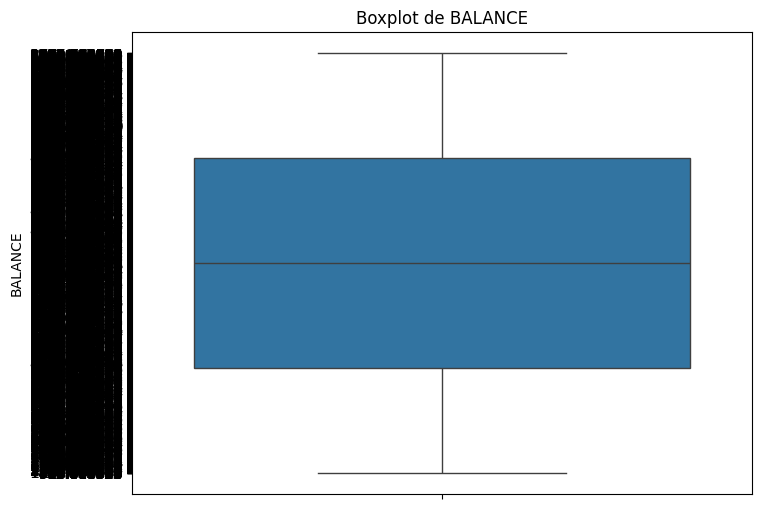

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.boxplot(df['BALANCE'])
plt.title('Boxplot de BALANCE')
plt.show()

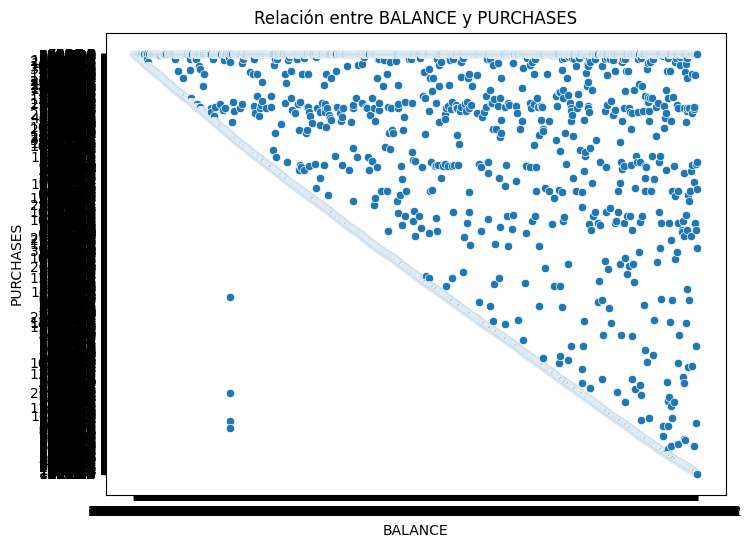

In [106]:
# Relación entre el saldo y las compras totales
plt.figure(figsize=(8,6))
sns.scatterplot(x='BALANCE', y='PURCHASES', data=df)
plt.title('Relación entre BALANCE y PURCHASES')
plt.show()


In [ ]:
bins = [0, 1000, 5000, 10000, np.inf]
labels = ['Bajo', 'Medio', 'Alto', 'Muy Alto']
df['Segmento_BALANCE'] = pd.cut(df['BALANCE'], bins=bins, labels=labels)

df['Segmento_BALANCE'].value_counts()